Weights: [0.22617968 0.51092415]
Bias: 0.20360831401960539
Cost: 0.4394220158182513


Weights: [0.20516165 0.49619895]
Bias: 0.1993404171952063
Cost: 0.4339570722060522


Weights: [0.18457961 0.48171322]
Bias: 0.19515230857349813
Cost: 0.42787714580665587


Weights: [0.16449164 0.46749876]
Bias: 0.19105448166574185
Cost: 0.4211845597543304


Weights: [0.14495861 0.45358893]
Bias: 0.18705791826436716
Cost: 0.4139045877398928


Weights: [0.12604286 0.4400179 ]
Bias: 0.1831738381664281
Cost: 0.40608893374118527


Weights: [0.10780638 0.42681969]
Bias: 0.17941338432146706
Cost: 0.397817429015553


Weights: [0.09030883 0.4140271 ]
Bias: 0.1757872564431601
Cost: 0.38919718868636866


Weights: [0.07360529 0.40167045]
Bias: 0.172305315918994
Cost: 0.3803587380728488


Weights: [0.0577441  0.38977645]
Bias: 0.16897619315308543
Cost: 0.37144909817150507


Weights: [0.04276482 0.37836705]
Bias: 0.16580693299095828
Cost: 0.3626224251381672


Weights: [0.02869666 0.36745859]
Bias: 0.162802712817599

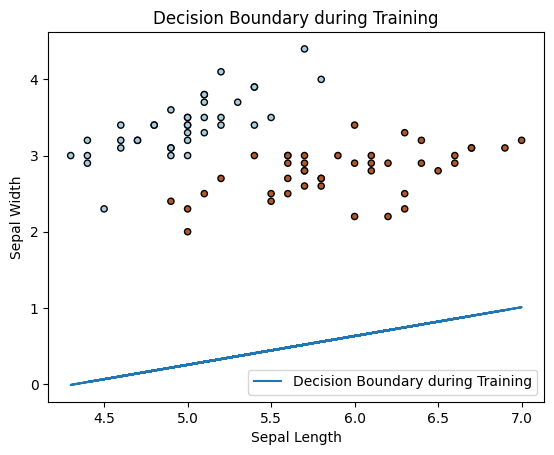

Accuracy: 0.40
Precision: 0.40
Recall: 1.00
F1-Score: 0.57

Insights:
The model achieved an accuracy of 0.40 on the testing set.
The precision is 0.40, recall is 1.00, and F1-score is 0.57.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent_slp(x, y, learning_rate=0.01, iterations=100):
    w = np.random.rand(x.shape[1])
    b = np.random.rand()
    n = len(x)

    for i in range(iterations):
        z = np.dot(x, w) + b
        y_predicted = sigmoid(z)

        dw = -(1/n) * np.dot(x.T, (y - y_predicted))
        db = -(1/n) * np.sum(y - y_predicted)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = np.mean((y - y_predicted) ** 2)

        print("Weights:", w)
        print("Bias:", b)
        print("Cost:", cost)
        print("\n")

    return w, b

def predict(x, w, b):
    z = np.dot(x, w) + b
    return sigmoid(z)

def plot_decision_boundary(x, y, w, b, title):
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=20)
    decision_boundary = -(b + w[0] * x[:, 0]) / w[1]
    plt.plot(x[:, 0], decision_boundary, label=title)
    plt.legend()
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()


iris = load_iris()
data = iris.data
target = iris.target


setosa_versicolor_mask = (target == 0) | (target == 1)
X = data[setosa_versicolor_mask, :2]
y = target[setosa_versicolor_mask]


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w, b = gradient_descent_slp(x_train, y_train)


plot_decision_boundary(x_train, y_train, w, b, title='Decision Boundary during Training')

y_pred = np.round(predict(x_test, w, b))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

print("\nInsights:")
print(f"The model achieved an accuracy of {accuracy:.2f} on the testing set.")
print(f"The precision is {precision:.2f}, recall is {recall:.2f}, and F1-score is {f1:.2f}.")
